In [53]:
from skimage import data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.neighbors import approximate,KDTree,BallTree
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import f1_score,completeness_score
from sklearn.metrics.cluster import contingency_matrix,entropy,homogeneity_score
from scipy.io import loadmat
from scipy.linalg import fractional_matrix_power

# Load Data

In [251]:
# covert image to sole vector
def image2matrix(img):
    image_2d = img.reshape(-1, 3)
    return image_2d


# load image from diretion
def loadimage(dataSetDir):
    X = []
    dimensions = []
    for i in range(1,51): #40 sample people
        filename = dataSetDir+'/'+str(i)+'.jpg'
        img = io.imread(filename)
        dimensions.append((img.shape[0],img.shape[1],img.shape[2]))
        img = image2matrix(img)
        X.append(img)
    return X,dimensions


def loadGT(dataSetDir):
    mat = []
    for i in range(1,51):
        filename = dataSetDir+'/'+str(i)+'.mat'
        mat.append(loadmat(filename))
    return mat

# Load Data Such That Feature Vector Includes Spatial Layout

In [252]:
def image2matrix_spatial_layout(img,x,y):
        layout = np.zeros((x*y,2))
        for i in range(x):
            for j in range(y):
                layout[i,0] = i 
                layout[i,1] = j
        image_2d = img.reshape(-1, 3)
        image_2d = np.hstack((image_2d,layout))
        return image_2d

# load image from diretion
def loadimagetest(dataSetDir):
    X = []
    dimensions = []
    for i in range(1,6): #40 sample people
        filename = dataSetDir+'/'+str(i)+'.jpg'
        img = io.imread(filename)
        dimensions.append((img.shape[0],img.shape[1],img.shape[2]))
        img = image2matrix(img)
        X.append(img)
    return X,dimensions

# Function To Display Image and It's Ground Truth

In [253]:
def display_Image_GT(img,dimensions,gt):
    plt.imshow(img.reshape(dimensions[0],dimensions[1],dimensions[2]))
    plt.show()
    for i in range(5):
        plt.imshow(gt['groundTruth'][0][i][0][0][0])
        plt.show()

# This Function Is used to assign a color to each cluster

In [254]:
def map_cluster_to_colors(img,k,labels):
    if k==3:
        for i in range(len(labels)):
            if(labels[i]==0):
                img[i,0]=255
                img[i,1]=0
                img[i,2]=0
            elif(labels[i]==1):
                img[i,0]=34
                img[i,1]=139
                img[i,2]=34
            elif(labels[i]==2):
                img[i,0]=100
                img[i,1]=149
                img[i,2]=237
    
    elif k==5:
        for i in range(len(labels)):
            if(labels[i]==0):
                img[i,0]=255
                img[i,1]=0
                img[i,2]=0
            elif(labels[i]==1):
                img[i,0]=34
                img[i,1]=139
                img[i,2]=34
            elif(labels[i]==2):
                img[i,0]=100
                img[i,1]=149
                img[i,2]=237
            elif(labels[i]==3):
                img[i,0]=255
                img[i,1]=255
                img[i,2]=0
            elif(labels[i]==4):
                img[i,0]=139
                img[i,1]=69
                img[i,2]=19
    elif k==7:
        for i in range(len(labels)):
            if(labels[i]==0):
                img[i,0]=255
                img[i,1]=0
                img[i,2]=0
            elif(labels[i]==1):
                img[i,0]=34
                img[i,1]=139
                img[i,2]=34
            elif(labels[i]==2):
                img[i,0]=100
                img[i,1]=149
                img[i,2]=237
            elif(labels[i]==3):
                img[i,0]=255
                img[i,1]=255
                img[i,2]=0
            elif(labels[i]==4):
                img[i,0]=139
                img[i,1]=69
                img[i,2]=19
            elif(labels[i]==5):
                img[i,0]=147
                img[i,1]=112
                img[i,2]=219
            elif(labels[i]==6):
                img[i,0]=255
                img[i,1]=192
                img[i,2]=203
                
    elif k==9:
        for i in range(len(labels)):
            if(labels[i]==0):
                img[i,0]=255
                img[i,1]=0
                img[i,2]=0
            elif(labels[i]==1):
                img[i,0]=34
                img[i,1]=139
                img[i,2]=34
            elif(labels[i]==2):
                img[i,0]=100
                img[i,1]=149
                img[i,2]=237
            elif(labels[i]==3):
                img[i,0]=255
                img[i,1]=255
                img[i,2]=0
            elif(labels[i]==4):
                img[i,0]=139
                img[i,1]=69
                img[i,2]=19
            elif(labels[i]==5):
                img[i,0]=147
                img[i,1]=112
                img[i,2]=219
            elif(labels[i]==6):
                img[i,0]=255
                img[i,1]=192
                img[i,2]=203
            elif(labels[i]==7):
                img[i,0]=255
                img[i,1]=140
                img[i,2]=0
            elif(labels[i]==8):
                img[i,0]=253
                img[i,1]=245
                img[i,2]=230
    elif k==11:
        for i in range(len(labels)):
            if(labels[i]==0):
                img[i,0]=255
                img[i,1]=0
                img[i,2]=0
            elif(labels[i]==1):
                img[i,0]=34
                img[i,1]=139
                img[i,2]=34
            elif(labels[i]==2):
                img[i,0]=100
                img[i,1]=149
                img[i,2]=237
            elif(labels[i]==3):
                img[i,0]=255
                img[i,1]=255
                img[i,2]=0
            elif(labels[i]==4):
                img[i,0]=139
                img[i,1]=69
                img[i,2]=19
            elif(labels[i]==5):
                img[i,0]=147
                img[i,1]=112
                img[i,2]=219
            elif(labels[i]==6):
                img[i,0]=255
                img[i,1]=192
                img[i,2]=203
            elif(labels[i]==7):
                img[i,0]=255
                img[i,1]=140
                img[i,2]=0
            elif(labels[i]==8):
                img[i,0]=253
                img[i,1]=245
                img[i,2]=230
            elif(labels[i]==9):
                img[i,0]=176
                img[i,1]=48
                img[i,2]=96
            elif(labels[i]==10):
                img[i,0]=240
                img[i,1]=230
                img[i,2]=140
    return img

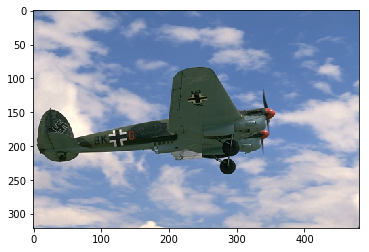

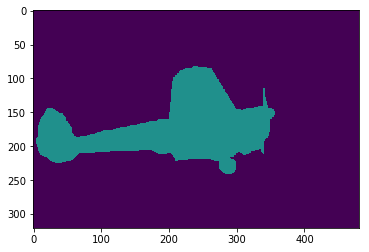

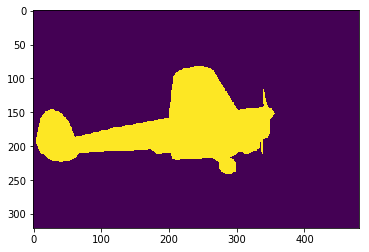

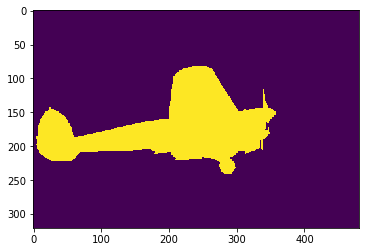

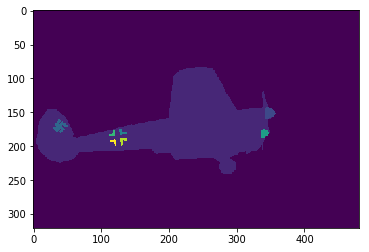

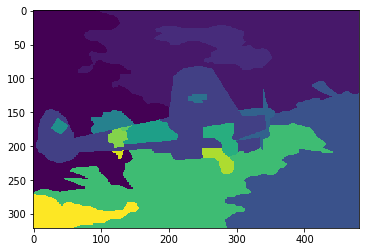

(96, 144, 3)


In [255]:
images,dimensions = loadimage(os.getcwd()+'/test')
images_encoded,dimensions_encoded = loadimage_encoded(os.getcwd()+'/test')
images_resized_encoded,dimensions_resized_encoded = loadimage_encoded(os.getcwd()+'/testResize')
images_resized,dimensions_resized = loadimage(os.getcwd()+'/testResize')
images_test,dimensions_test = loadimagetest(os.getcwd()+'/test2')
images_resized = images_resized[:5]
dimensions_resized = dimensions_resized[:5]
groundTruths = loadGT(os.getcwd()+'/testGT')
display_Image_GT(images[1],dimensions[1],groundTruths[1])
print(dimensions_resized[1])

# Perform KMeans Algorithm Using Different Ks on Five Images

In [6]:
Segmented_Images = []
Segmented_Images_labels = []
K = [3,5,7,9,11]
for i in range(5):
    sample = []
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init=20,n_jobs=-1)
        kmeans.fit(images[i])
        centers = kmeans.cluster_centers_
        labels = kmeans.predict(images[i])
        Segmented_Images_labels.append(labels)
        x = dimensions[i][0]
        y = dimensions[i][1]
        z = dimensions[i][2]
        img = map_cluster_to_colors((centers[labels].reshape(x*y, z)).astype(np.uint8),k,labels)
        sample.append(img.reshape(x,y,z))
    Segmented_Images.append(sample)  

(154401, 3)


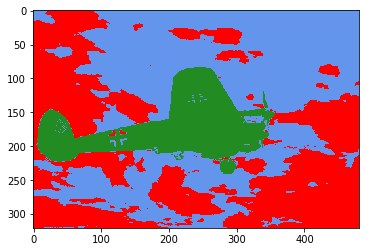

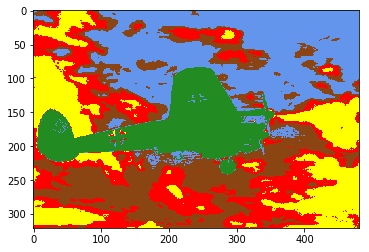

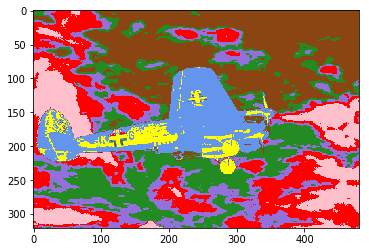

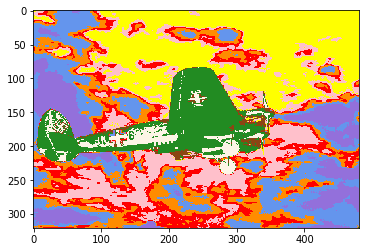

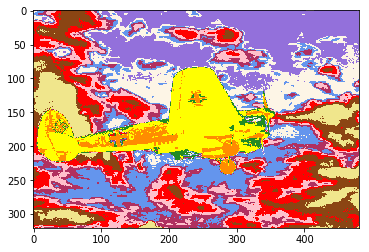

In [9]:
print(img.shape)
for i in range(5):
    plt.imshow(Segmented_Images[1][i])
    plt.show()

# Chosen Ground Truths For The Five Images

In [10]:
gtEvaluation = [groundTruths[0]['groundTruth'][0][3][0][0][0].reshape(481*321).tolist(),groundTruths[1]['groundTruth'][0][0][0][0][0].reshape(481*321).tolist(),groundTruths[2]['groundTruth'][0][4][0][0][0].reshape(481*321).tolist(),
               groundTruths[3]['groundTruth'][0][3][0][0][0].reshape(481*321).tolist(),groundTruths[4]['groundTruth'][0][4][0][0][0].reshape(481*321).tolist()]

# Helper Functions For Evaluation

In [63]:
def get_Fscore(contingency_table):
    prec = []
    recall = []
    F = 0
    lastc = contingency_table.shape[1]-1
    lastr = contingency_table.shape[0]-1
    for i in range(len(contingency_table)-1):
        prec.append(max(contingency_table[i,:lastc])/np.sum(contingency_table[i,:lastc],axis=0))
        
    for i in range(len(contingency_table)-1):
        temp = contingency_table[i,:lastc].tolist()
        index = temp.index(max(temp))
        recall.append(max(temp)/contingency_table[lastr,index])
    
    for i in range(contingency_table.shape[0]-1):
        F+= (2*prec[i]*recall[i])/(prec[i]+recall[i])
    F = (1/(contingency_table.shape[0]-1))*F
    return F

def get_conditionalEntropy(contingency_table):
    HTC = []
    HTC_temp = 0
    HTC_total = 0
    n = np.sum(contingency_table[contingency_table.shape[0]-1,:])
    lastc = contingency_table.shape[1]-1
    lastr = contingency_table.shape[0]-1
    for i in range(len(contingency_table)-1):
        for j in range(contingency_table.shape[1]-1):
            if(contingency_table[i,j]!=0):
                HTC_temp += -1*((contingency_table[i,j]/contingency_table[i,lastc])*np.log(contingency_table[i,j]/contingency_table[i,lastc]))
        HTC.append(HTC_temp)
        HTC_temp=0
    
    for i in range(len(HTC)):
        HTC_total += ((contingency_table[i,lastc])/n)*HTC[i]
        
    return HTC_total

def Evaluate(contingency_table):
    rowsum = np.sum(contingency_table,axis=0)
    contingency_table = np.vstack((contingency_table,rowsum))
    colsum = np.sum(contingency_table,axis=1)
    contingency_table = np.hstack((contingency_table,colsum.reshape(contingency_table.shape[0],1)))
    contingency_table[contingency_table.shape[0]-1,contingency_table.shape[1]-1] = 0
    fscore = get_Fscore(contingency_table)
    conditional_entropy = get_conditionalEntropy(contingency_table)
    print('Fscore = ',fscore)
    print('Conditional Entropy = ',conditional_entropy)

# Evaluation

For Image  1 



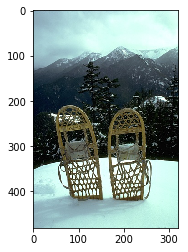

For K =  3
Fscore =  0.5551958245262927
Conditional Entropy =  1.0550937809573422


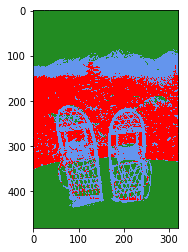



For K =  5
Fscore =  0.46989565075436146
Conditional Entropy =  1.0329520375212744


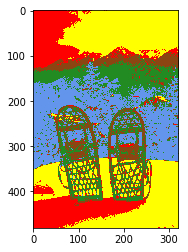



For K =  7
Fscore =  0.44807166262182735
Conditional Entropy =  1.0002592224848639


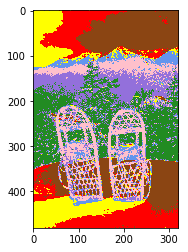



For K =  9
Fscore =  0.374527154228327
Conditional Entropy =  0.948992682252185


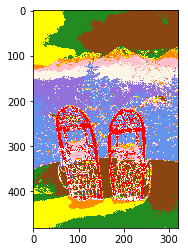



For K =  11
Fscore =  0.3751645046941128
Conditional Entropy =  0.8905993413426772


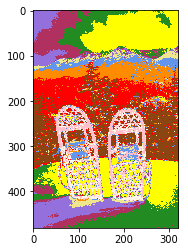



For Image  2 



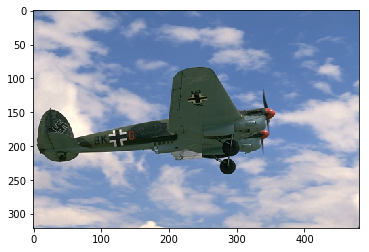

For K =  3
Fscore =  0.3170905922717058
Conditional Entropy =  0.3345432835276752


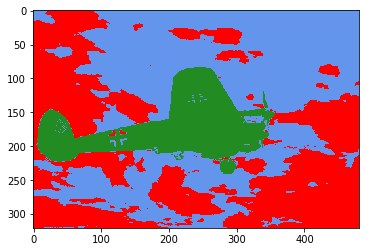



For K =  5
Fscore =  0.2415350626328
Conditional Entropy =  0.3310653989849755


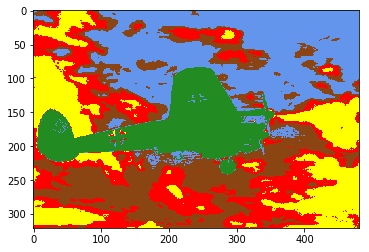



For K =  7
Fscore =  0.1923202480972116
Conditional Entropy =  0.32485575029432884


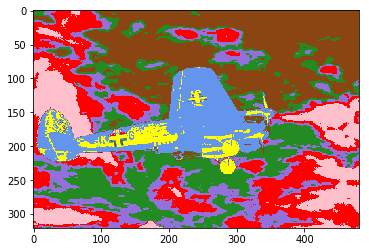



For K =  9
Fscore =  0.16072022089143104
Conditional Entropy =  0.3236884063774272


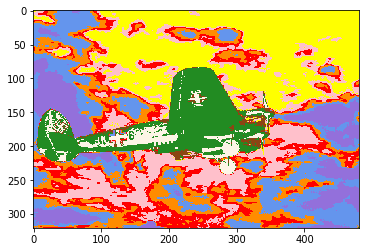



For K =  11
Fscore =  0.7596282371632609
Conditional Entropy =  0.06769636491703251


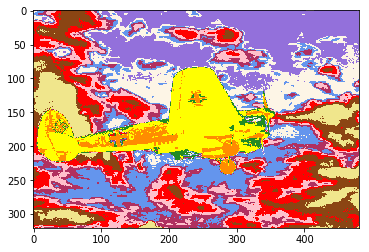



For Image  3 



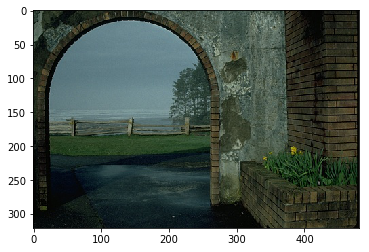

For K =  3
Fscore =  0.22972130413429215
Conditional Entropy =  1.9284746716793302


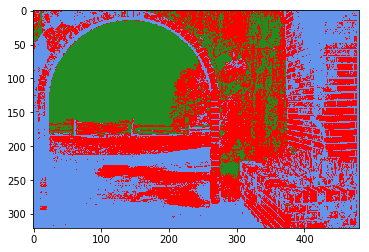



For K =  5
Fscore =  0.2000565582611049
Conditional Entropy =  1.9082511519560394


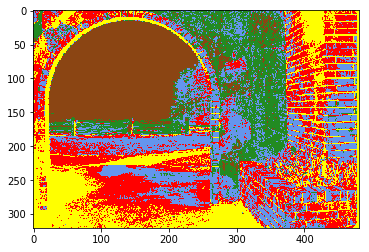



For K =  7
Fscore =  0.18302843872432223
Conditional Entropy =  1.873211118726661


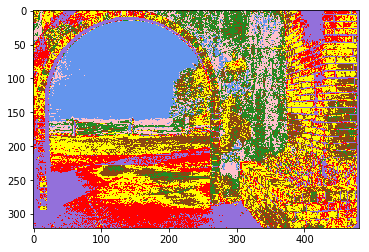



For K =  9
Fscore =  0.3621507374856865
Conditional Entropy =  1.8506753558618958


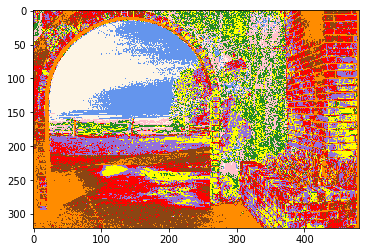



For K =  11
Fscore =  0.3669173242975242
Conditional Entropy =  1.7428122595721858


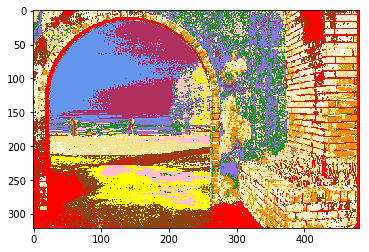



For Image  4 



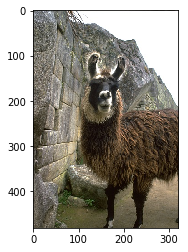

For K =  3
Fscore =  0.26551192210539754
Conditional Entropy =  1.6170901091977137


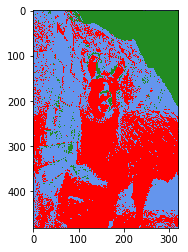



For K =  5
Fscore =  0.24747788878828497
Conditional Entropy =  1.5669296006267661


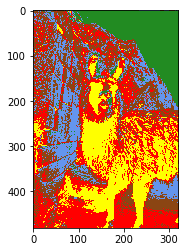



For K =  7
Fscore =  0.370193168779396
Conditional Entropy =  1.9150297539765573


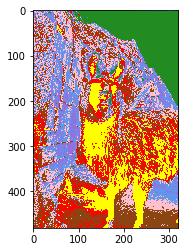



For K =  9
Fscore =  0.2902846395896699
Conditional Entropy =  1.7997586300512691


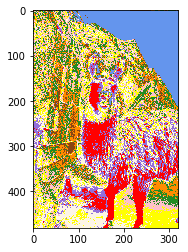



For K =  11
Fscore =  0.22776752599995767
Conditional Entropy =  1.789431254102401


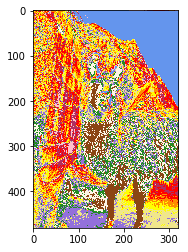



For Image  5 



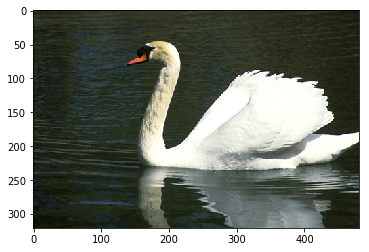

For K =  3
Fscore =  0.17350305402831653
Conditional Entropy =  0.966866740150443


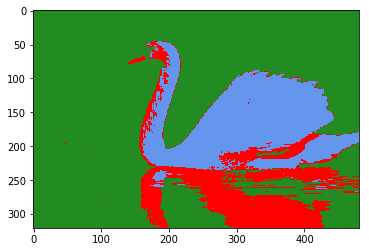



For K =  5
Fscore =  0.4040295986866141
Conditional Entropy =  1.0592784251994636


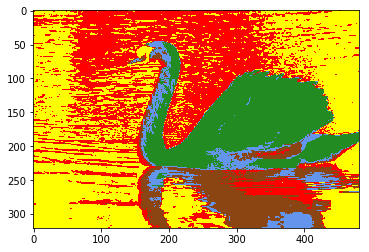



For K =  7
Fscore =  0.2949444342562923
Conditional Entropy =  0.9908172279750381


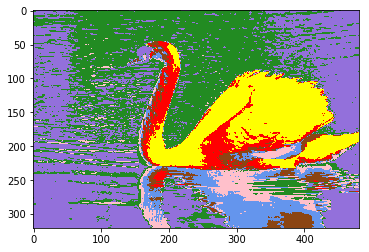



For K =  9
Fscore =  0.233873520391803
Conditional Entropy =  0.993081083963665


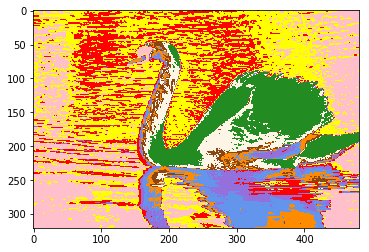



For K =  11
Fscore =  0.1950979075425764
Conditional Entropy =  0.9802689638493871


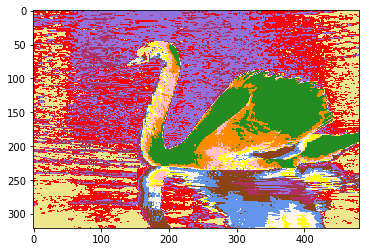

In [207]:
k = 0
m=0
for i in range(5):
    print('For Image ',i+1,'\n')
    plt.imshow(images[i].reshape(dimensions[i][0],dimensions[i][1],dimensions[i][2]))
    plt.show()
    for j in range(5):
        cont = contingency_matrix(Segmented_Images_labels[i+j],gtEvaluation[m])
        print('For K = ',K[k])
        Evaluate(cont)
        plt.imshow(Segmented_Images[i][j].reshape(dimensions[i][0],dimensions[i][1],dimensions[i][2]))
        plt.show()
        print('\n')
        k=k+1
    k=0
    m=m+1

# Big Picture

## a set of five images and display their corresponding ground truth against your segmentation results using K-means at K=5

In [238]:
gt2 = [groundTruths[0]['groundTruth'][0][3][0][0][0],groundTruths[1]['groundTruth'][0][4][0][0][0],groundTruths[15]['groundTruth'][0][4][0][0][0],
               groundTruths[3]['groundTruth'][0][3][0][0][0],groundTruths[4]['groundTruth'][0][4][0][0][0]]

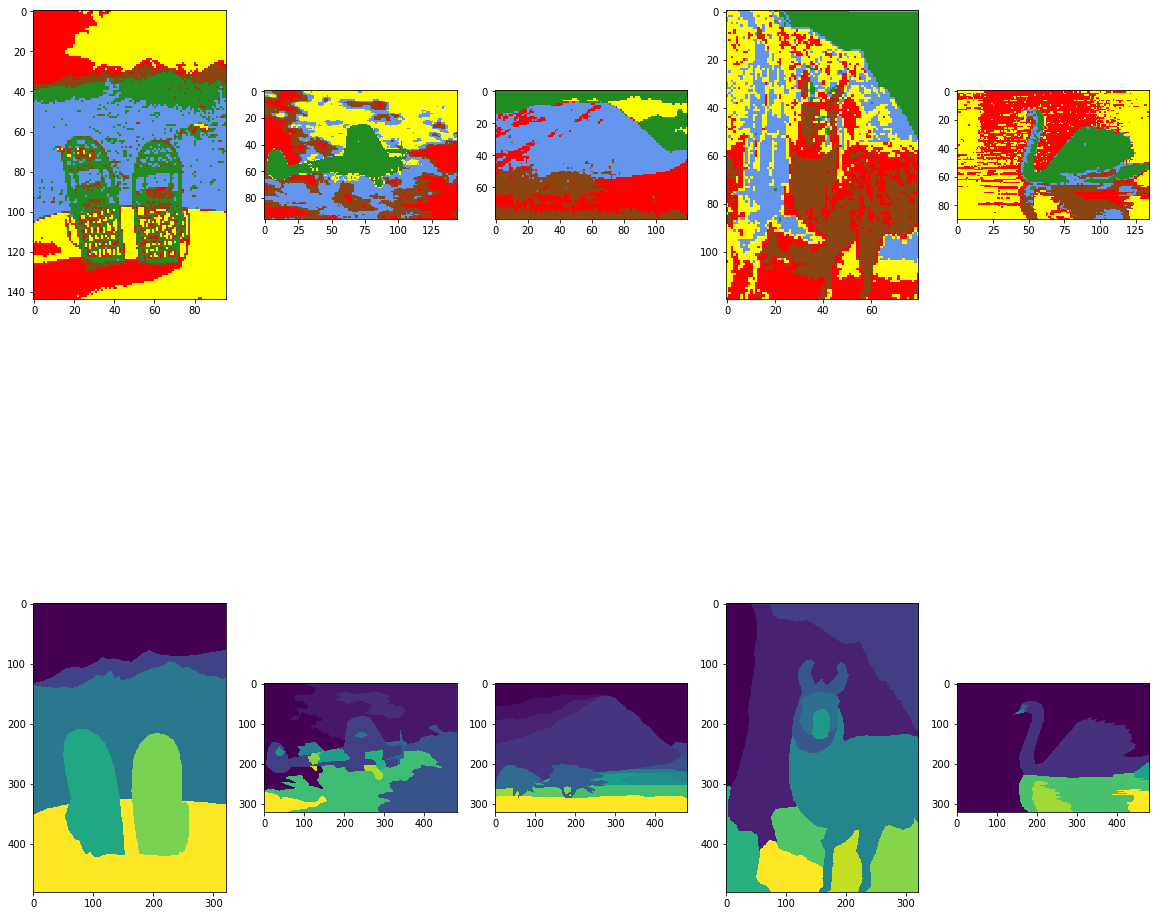

In [250]:
Segmented_Resized_Images = []
for i in range(5):
    kmeans = KMeans(n_clusters=5,n_jobs=-1)
    labels = kmeans.fit_predict(images_resized[i])
    img = np.copy(images_resized[i])
    x = dimensions_resized[i][0]
    y = dimensions_resized[i][1]
    z = dimensions_resized[i][2]
    img = map_cluster_to_colors((img.reshape(x*y, z)).astype(np.uint8),5,labels)
    Segmented_Resized_Images.append(img.reshape(x,y,z))  

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
j = 0
for i in range(1,6):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Segmented_Resized_Images[j].reshape(dimensions_resized[j][0],dimensions_resized[j][1],3))
    j=j+1
j=0
for i in range(6,11):
    fig.add_subplot(rows, columns, i)
    plt.imshow(gt2[j])
    j=j+1
plt.show()

## five images and display their corresponding ground truth against your segmentation results using Normalized-cut for the 5-NN graph, at K=5

/home/rami96/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/rami96/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/rami96/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/rami96/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embeddi

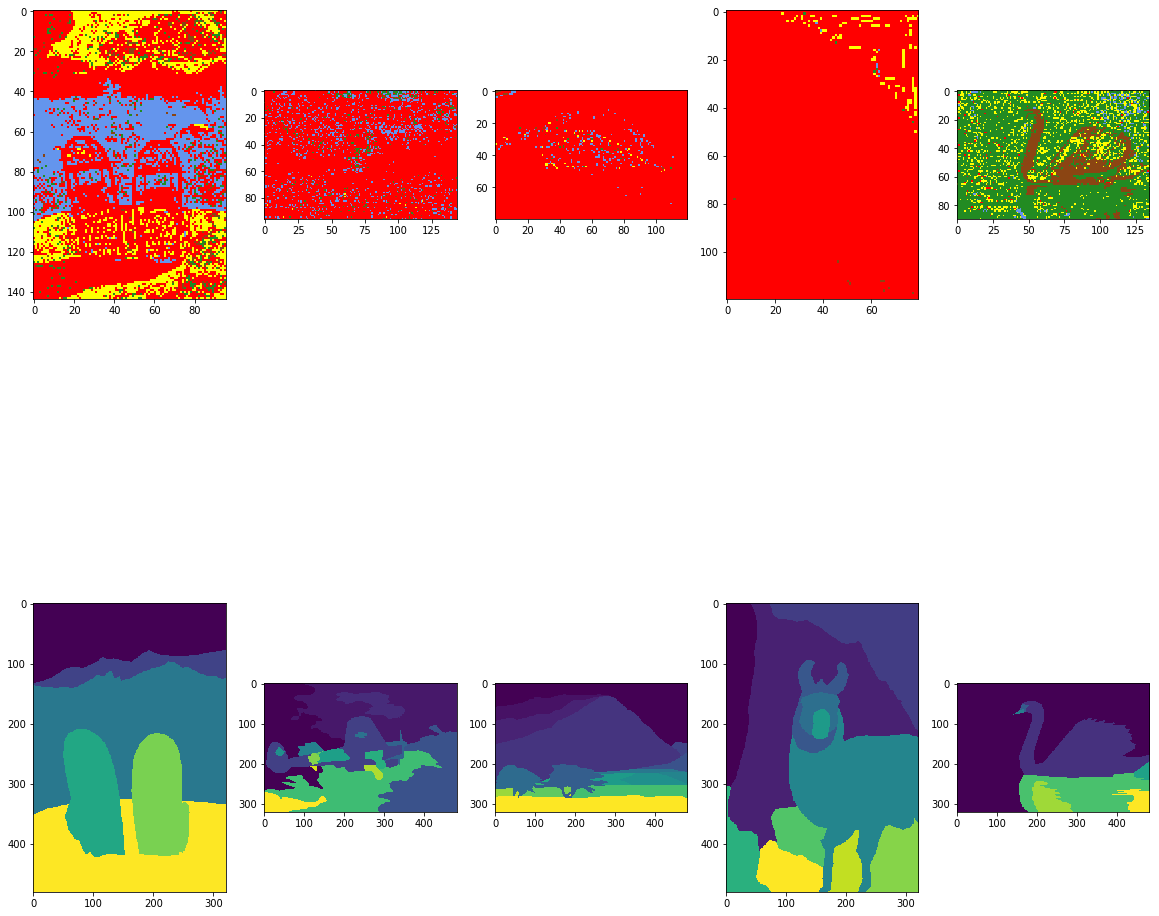

In [245]:
Segmented_Images_resized_spectral = []
for i in range(5):
    spectral = SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=5,n_jobs=-1)
    labels = spectral.fit_predict(images_resized[i])
    img = np.copy(images_resized[i])
    x = dimensions_resized[i][0]
    y = dimensions_resized[i][1]
    z = dimensions_resized[i][2]
    img = map_cluster_to_colors((img.reshape(x*y, z)).astype(np.uint8),5,labels)
    Segmented_Images_resized_spectral.append(img.reshape(x,y,z))  

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
j = 0
for i in range(1,6):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Segmented_Images_resized_spectral[j].reshape(dimensions_resized[j][0],dimensions_resized[j][1],3))
    j=j+1
j=0
for i in range(6,11):
    fig.add_subplot(rows, columns, i)
    plt.imshow(gt2[j])
    j=j+1
plt.show()

## Five images and contrast your segmentation results using Normalized-cut for the 5-NN graph, at K=5 versus using K-means at K=5

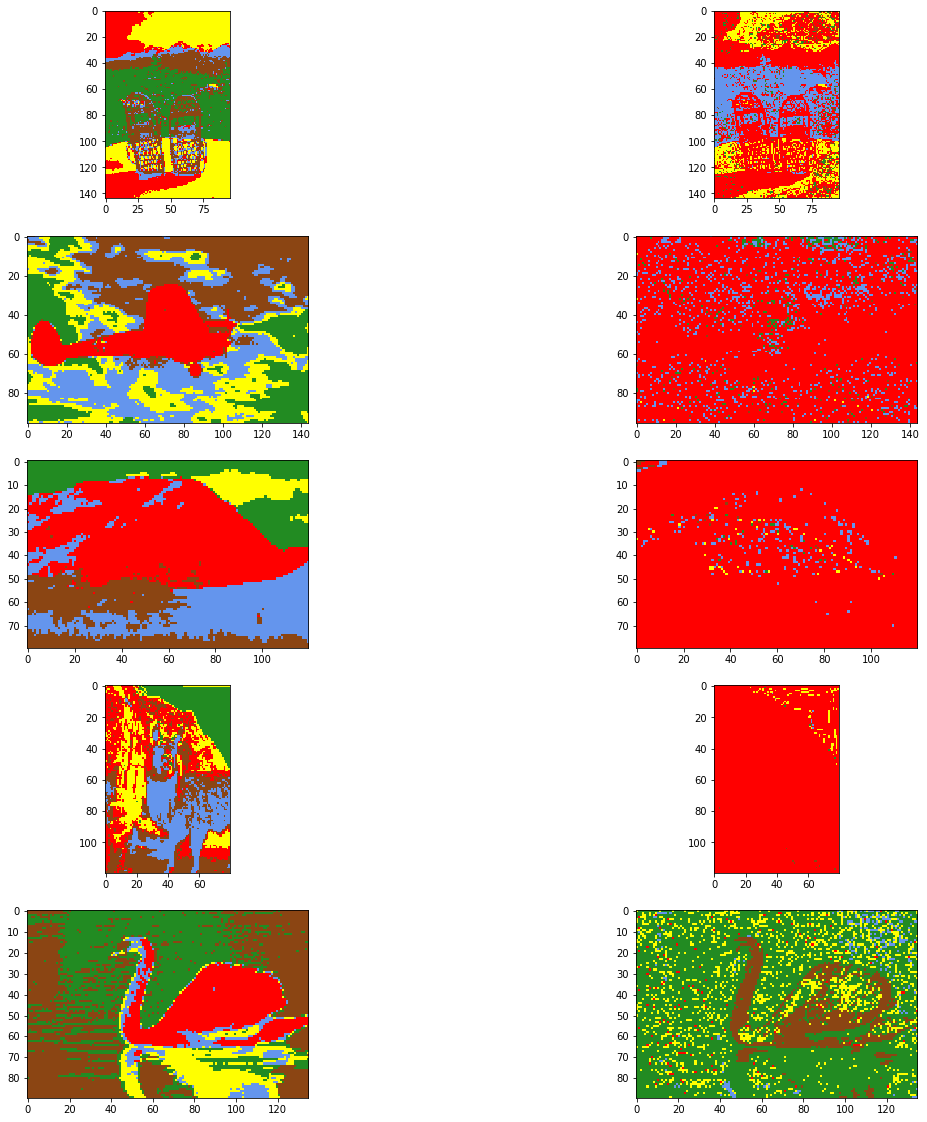

In [246]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 5
j = 0
for i in range(1,11):
    fig.add_subplot(rows, columns, i)
    if i%2==0:
        plt.imshow(Segmented_Images_resized_spectral[j].reshape(dimensions_resized[j][0],dimensions_resized[j][1],3))
        j=j+1
    else:
        plt.imshow(Segmented_Resized_Images[j].reshape(dimensions_resized[j][0],dimensions_resized[j][1],3))
plt.show()

## Comparing Results of Kmeans on ecnoded images and original images segmentation using K=5 but both images are resized

In [258]:
Segmented_Images_resized_encoded = []
for i in range(5):
    kmeans = KMeans(n_clusters=5,n_jobs=-1)
    labels = kmeans.fit_predict(images_resized_encoded[i])
    img = np.copy(images_resized_encoded[i])
    x = dimensions_resized_encoded[i][0]
    y = dimensions_resized_encoded[i][1]
    z = dimensions_resized_encoded[i][2]
    img = map_cluster_to_colors((centers[:,:3][labels].reshape(x*y, z)).astype(np.uint8),5,labels)
    Segmented_Images_resized_encoded.append(img.reshape(x,y,z))

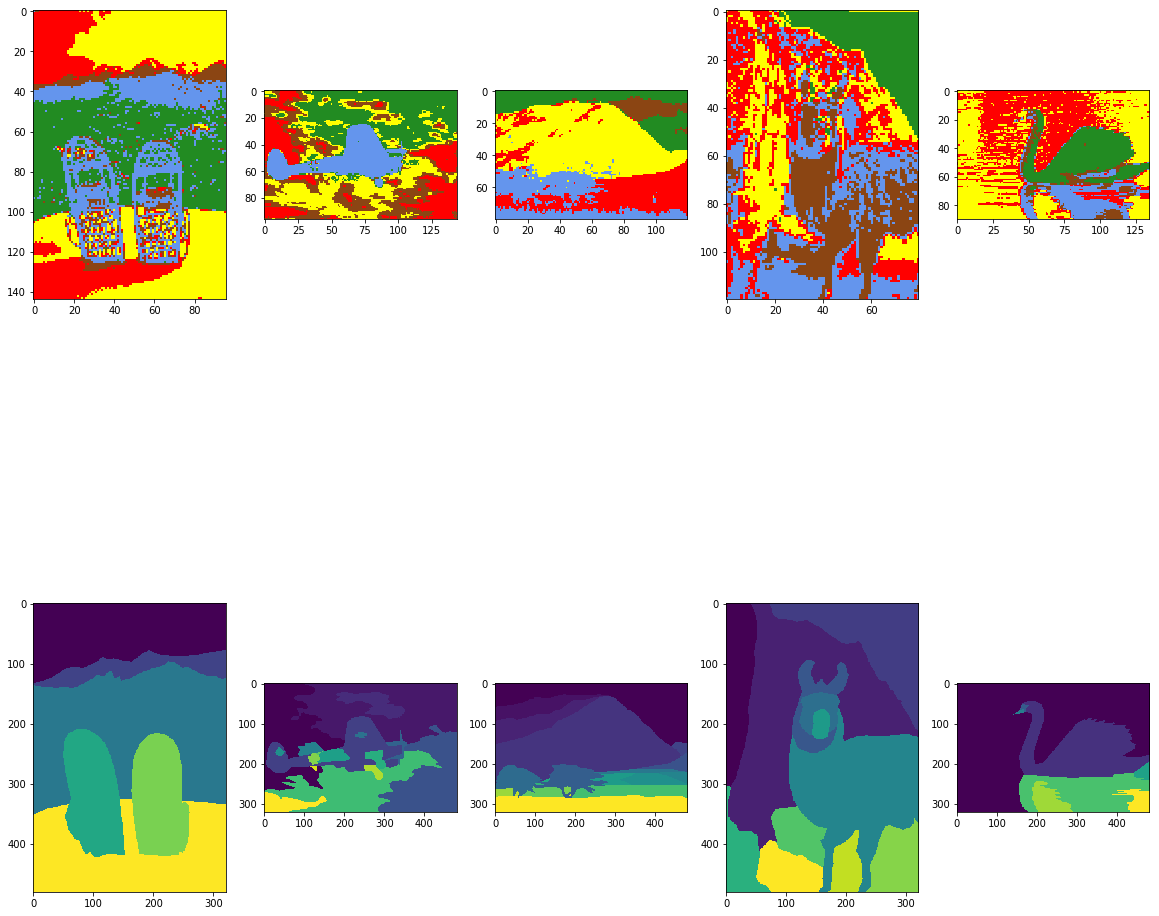

In [259]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
j = 0
for i in range(1,6):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Segmented_Images_resized_encoded[j].reshape(dimensions_resized[j][0],dimensions_resized[j][1],3))
    j=j+1
j=0
for i in range(6,11):
    fig.add_subplot(rows, columns, i)
    plt.imshow(gt2[j])
    j=j+1
plt.show()

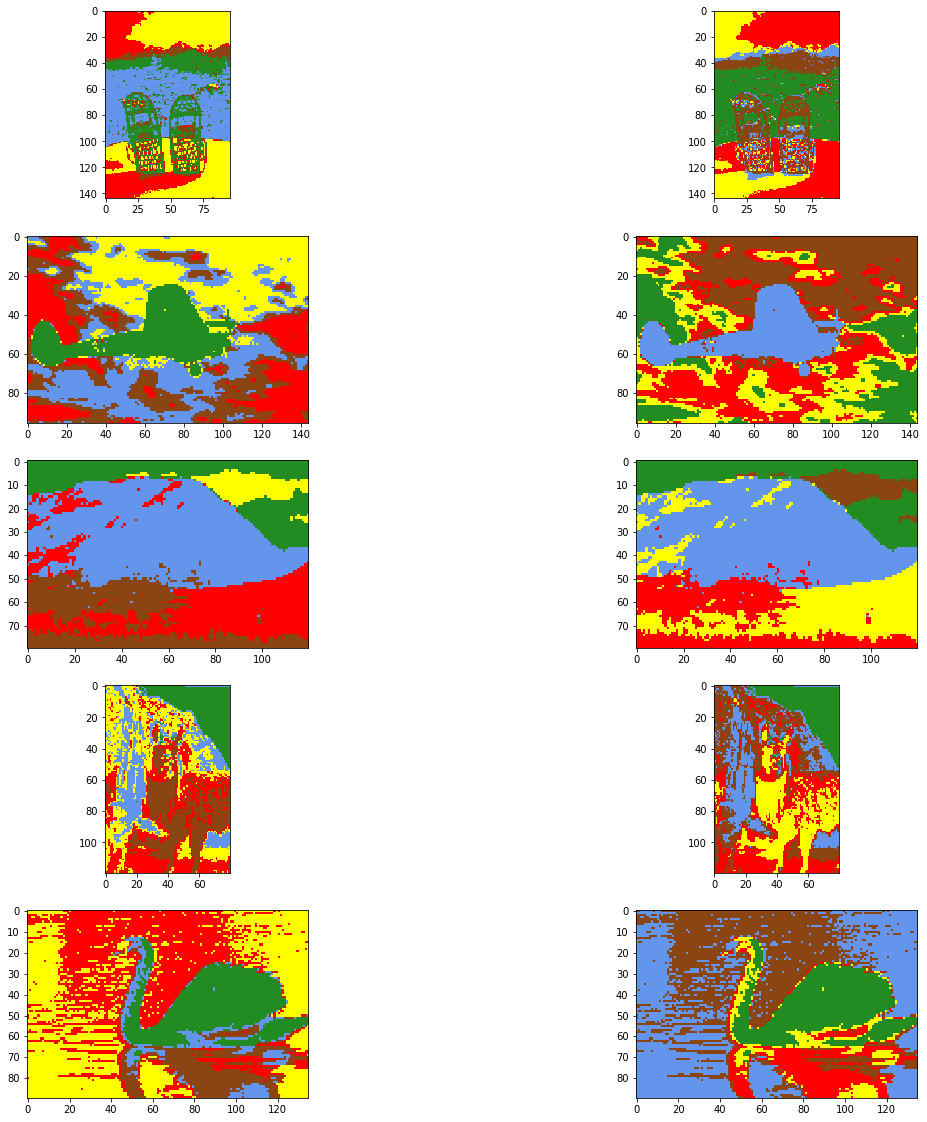

In [257]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 5
j = 0
for i in range(1,11):
    fig.add_subplot(rows, columns, i)
    if i%2==0:
        plt.imshow(Segmented_Images_resized_encoded[j].reshape(dimensions_resized_encoded[j][0],dimensions_resized_encoded[j][1],3))
        j=j+1
    else:
        plt.imshow(Segmented_Resized_Images[j].reshape(dimensions_resized_encoded[j][0],dimensions_resized_encoded[j][1],3))
plt.show()

## Comparing Results of Kmeans on ecnoded images and original images segmentation using K=5

In [221]:
Segmented_Images_encoded = []
for i in range(5):
    kmeans = KMeans(n_clusters=5,n_init=30,n_jobs=-1,max_iter=400)
    labels = kmeans.fit_predict(images_encoded[i])
    img = np.copy(images_encoded[i])
    x = dimensions_encoded[i][0]
    y = dimensions_encoded[i][1]
    z = dimensions_encoded[i][2]
    img = map_cluster_to_colors((centers[:,:3][labels].reshape(x*y, z)).astype(np.uint8),5,labels)
    Segmented_Images_encoded2.append(img.reshape(x,y,z))

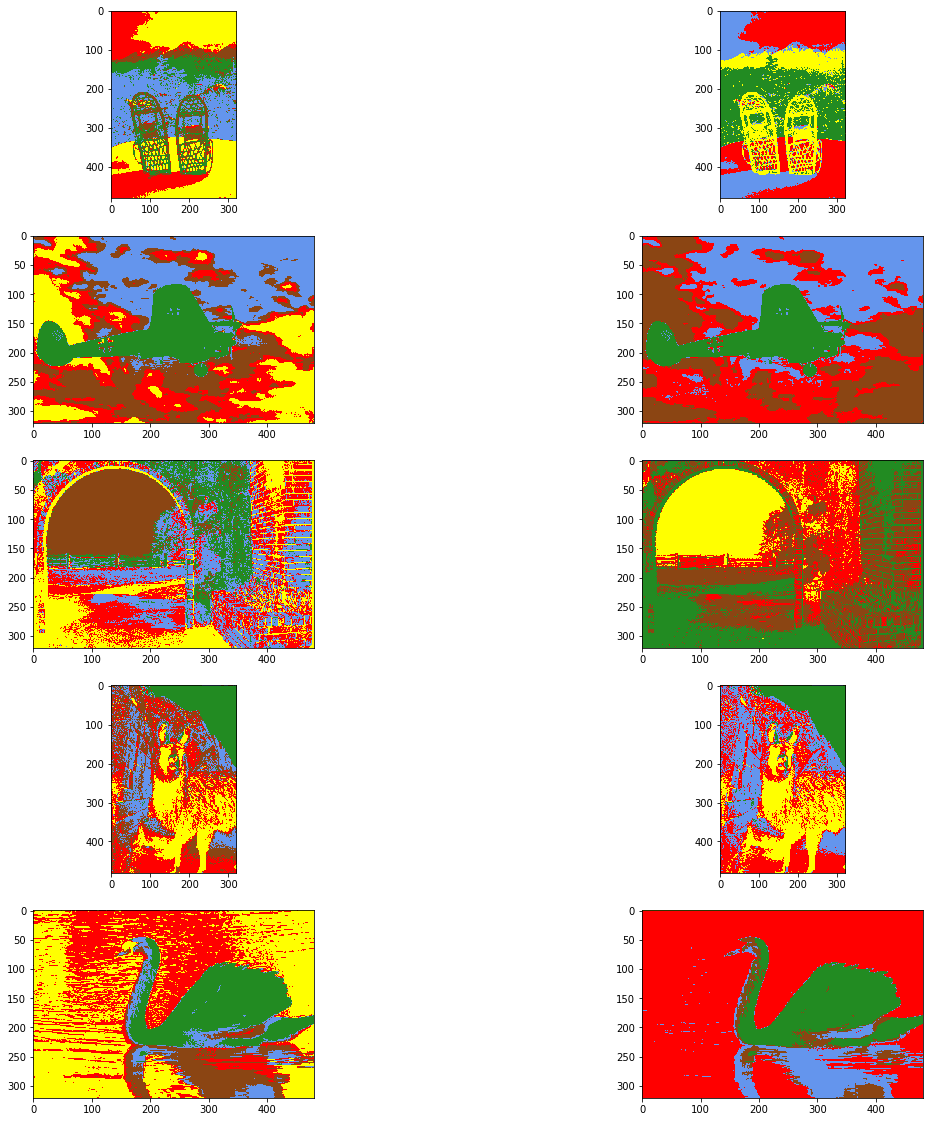

In [222]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 5
j = 0
for i in range(1,11):
    fig.add_subplot(rows, columns, i)
    if i%2==0:
        plt.imshow(Segmented_Images_encoded[j].reshape(dimensions[j][0],dimensions[j][1],3))
        j=j+1
    else:
        plt.imshow(Segmented_Images[j][1].reshape(dimensions[j][0],dimensions[j][1],3))
plt.show()

In [134]:
temp_Images = []
temp = []
for i in range(len(images)):
    kmeans = KMeans(n_clusters=11,n_jobs=-1)
    kmeans.fit(images[i])

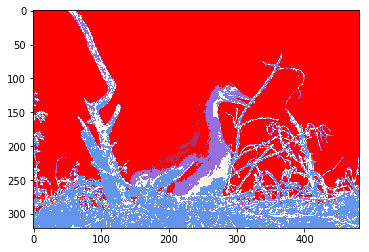

In [135]:
labels = kmeans.predict(images_test[1])
centers = kmeans.cluster_centers_
x = dimensions_test[1][0]
y = dimensions_test[1][1]
z = dimensions_test[1][2]
img = map_cluster_to_colors((centers[labels].reshape(x*y, z)).astype(np.uint8),11,labels)
plt.imshow(img.reshape(x,y,z))